In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import pandas as pd
df=pd.read_csv("loan_approved.csv")

In [2]:
s1=df['ApplicantIncome'].skew()
k1=df['ApplicantIncome'].kurt()
print("ApplicantIncome skew:",s1,"Kurtosis",k1)

s2=df['CoapplicantIncome'].skew()
k2=df['CoapplicantIncome'].kurt()
print("CoapplicantIncome skew:",s2,"Kurtosis",k2)

s3=df['LoanAmount'].skew()
k3=df['LoanAmount'].kurt()
print("LoanAmount skew:",s3,"Kurtosis",k3)

s4=df['Loan_Amount_Term'].skew()
k4=df['Loan_Amount_Term'].kurt()
print("Loan_Amount_Term skew:",s4,"Kurtosis",k4)

ApplicantIncome skew: 6.539513113994625 Kurtosis 60.54067593369113
CoapplicantIncome skew: 7.491531216657306 Kurtosis 84.95638421103374
LoanAmount skew: 2.677551679256059 Kurtosis 10.40153349029416
Loan_Amount_Term skew: -2.362414124216269 Kurtosis 6.673473692814259


In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df1=pd.get_dummies(df['Property_Area'],prefix='Property_Area',drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Property_Area'],axis=1)

In [5]:
df1=pd.get_dummies(df['Gender'],prefix='gender',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Gender'],axis=1)

In [6]:
df1=pd.get_dummies(df['Married'],prefix='married',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Married'],axis=1)

In [7]:
df1=pd.get_dummies(df['Self_Employed'],prefix='Self_Employed',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Self_Employed'],axis=1)

In [8]:
df1=pd.get_dummies(df['Education'],prefix='Education',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Education'],axis=1)

In [9]:
df1=pd.get_dummies(df['Dependents'],prefix='Dependents',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Dependents'],axis=1)

In [10]:
df1=pd.get_dummies(df['Loan_Status (Approved)'],prefix='Loan_Status (Approved)',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Loan_Status (Approved)'],axis=1)

In [11]:
df.head(5)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,gender_Male,married_Yes,Self_Employed_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Loan_Status (Approved)_Y
0,LP001002,5849,0.0,NaN,360.0,1.0,False,True,1,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,False,False,1,1,0,0,1,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,False,True,1,1,1,0,0,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,False,True,1,1,0,1,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,False,True,1,0,0,0,0,0,0,1


In [12]:
df.shape

(614, 16)

In [13]:
df['LoanAmount'].kurtosis()

np.float64(10.40153349029416)

In [14]:
df['LoanAmount'].skew()

np.float64(2.677551679256059)

<Axes: xlabel='LoanAmount', ylabel='Count'>

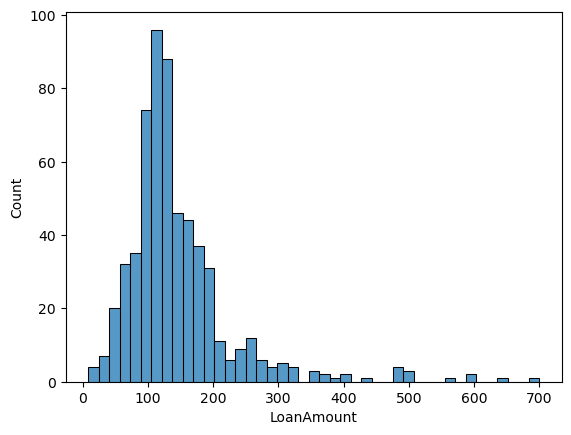

In [16]:
sns.histplot(df['LoanAmount'])

In [18]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='box-cox')
#trans=PowerTransformer(method='yeo-johson')

In [25]:
la_trans=trans.fit_transform(df[['LoanAmount']])
la_trans.shape

(614, 1)

In [21]:
print(pd.Series(la_trans.reshape(614,)).skew())
print(pd.Series(la_trans.reshape(614,)).kurtosis())

0.025572275242368367
2.3045298672798


In [26]:
print(df['Loan_Amount_Term'].skew())
print(df['Loan_Amount_Term'].kurtosis())

-2.362414124216269
6.673473692814259


In [27]:
lat_trans=trans.fit_transform(df[['Loan_Amount_Term']])
lat_trans.shape
print(pd.Series(lat_trans.reshape(614,)).skew())
print(pd.Series(lat_trans.reshape(614,)).kurtosis())

0.3621363593380147
6.775567847153299


In [31]:
trans1=PowerTransformer(method='yeo-johnson')
lat_trans=trans1.fit_transform(df[['Loan_Amount_Term']])
lat_trans.shape
print(pd.Series(lat_trans.reshape(614,)).skew())
print(pd.Series(lat_trans.reshape(614,)).kurtosis())

0.3661790206730569
6.785939396380789


In [32]:
print(df['ApplicantIncome'].skew())
print(df['ApplicantIncome'].kurtosis())

6.539513113994625
60.54067593369113


In [34]:
trans=PowerTransformer(method='box-cox')
ai_trans=trans.fit_transform(df[['ApplicantIncome']])
ai_trans.shape
print(pd.Series(ai_trans.reshape(614,)).skew())
print(pd.Series(ai_trans.reshape(614,)).kurtosis())

-0.0925125048077767
4.778393672309124


In [35]:
trans1=PowerTransformer(method='yeo-johnson')
ai_trans=trans1.fit_transform(df[['ApplicantIncome']])
ai_trans.shape
print(pd.Series(ai_trans.reshape(614,)).skew())
print(pd.Series(ai_trans.reshape(614,)).kurtosis())

-0.09294567889276603
4.77062663426899


In [36]:
print(df['CoapplicantIncome'].skew())
print(df['CoapplicantIncome'].kurtosis())

7.491531216657306
84.95638421103374


In [38]:
trans1=PowerTransformer(method='yeo-johnson')
cai_trans=trans1.fit_transform(df[['CoapplicantIncome']])
cai_trans.shape
print(pd.Series(cai_trans.reshape(614,)).skew())
print(pd.Series(cai_trans.reshape(614,)).kurtosis())

-0.14564645710551902
-1.8778432766544493
